# Notebook Imports

In [317]:
# Linear Regression Model 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Data Analysis
import pandas as pd
from pandas import DataFrame
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical Model
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Gather and Load Data

In [318]:
# Creating a Pandas DataFrame from CSV File
life_data = pd.read_csv("Life Data.csv")

# Data Exploration with Pandas DataFrame

In [319]:
life_data.head()

,YEAR,ADLT_MOR,ALCO,HEPT-B,BMI,POLIO,TOT_EXPD,DIPTR,HIV/AIDS,POPLN,THIN_1_19,THIN_5_9,ICOR,SCH,LIFE_EXP
0,2003,6,5.65,9,27.1,87,5.71,85,50.6,187392.0,8.2,8.4,0.493,9.1,45.9
1,2004,69,5.78,93,27.4,88,5.88,86,50.3,19553.0,7.7,7.9,0.492,9.4,45.6
2,2002,587,5.52,88,26.7,87,5.16,85,49.9,1893.0,8.6,8.8,0.502,9.2,46.4
3,2005,63,5.08,95,27.8,88,6.80,86,49.1,115873.0,7.3,7.5,0.495,9.7,46.0
4,2001,568,6.72,86,26.3,87,5.11,84,48.8,172927.0,9.0,9.2,0.506,9.3,47.1


In [320]:
life_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   YEAR       1600 non-null   int64  
 1   ADLT_MOR   1600 non-null   int64  
 2   ALCO       1600 non-null   float64
 3   HEPT-B     1600 non-null   int64  
 4   BMI        1600 non-null   float64
 5   POLIO      1600 non-null   int64  
 6   TOT_EXPD   1600 non-null   float64
 7   DIPTR      1600 non-null   int64  
 8   HIV/AIDS   1600 non-null   float64
 9   POPLN      1600 non-null   float64
 10  THIN_1_19  1600 non-null   float64
 11  THIN_5_9   1600 non-null   float64
 12  ICOR       1600 non-null   float64
 13  SCH        1600 non-null   float64
 14  LIFE_EXP   1600 non-null   float64
dtypes: float64(10), int64(5)
memory usage: 187.6 KB


In [321]:
# Checking for null & missing values
pd.isnull(life_data).any()

YEAR         False
ADLT_MOR     False
ALCO         False
HEPT-B       False
BMI          False
POLIO        False
TOT_EXPD     False
DIPTR        False
HIV/AIDS     False
POPLN        False
THIN_1_19    False
THIN_5_9     False
ICOR         False
SCH          False
LIFE_EXP     False
dtype: bool

# Data Visualization: Distributions, Histograms and Charts

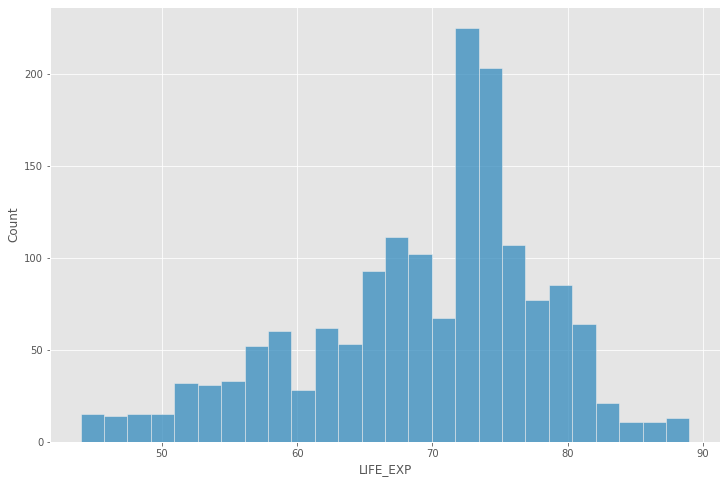

In [322]:
plt.figure(figsize=[12, 8])
plt.style.use("ggplot")
sns.histplot(data=life_data["LIFE_EXP"])
plt.show()

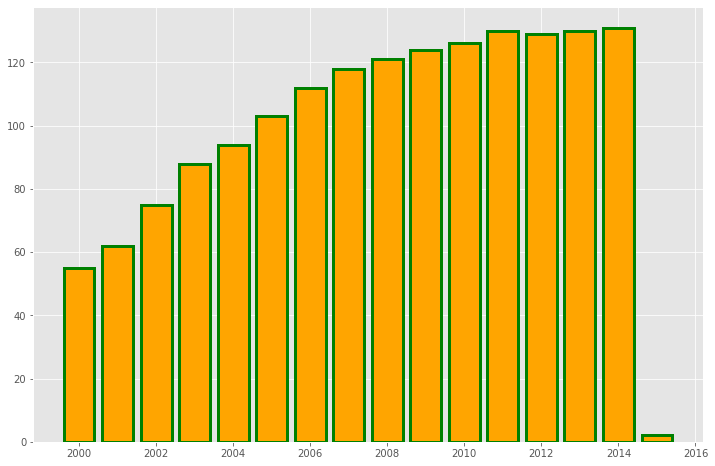

In [323]:
frequency = life_data.YEAR.value_counts()
plt.figure(figsize=[12, 8])
plt.bar(frequency.index, height=frequency, linewidth=3, edgecolor="green", color="orange")

plt.show()

# Correlation

## $$ \rho_{XY} = corr(X, Y) $$
## $$ -1.0 \leq \rho XY \leq + 1.0 $$

In [324]:
# Correlaton between Life Expectancy and ADLT_MOR
life_data["LIFE_EXP"].corr(life_data["ADLT_MOR"])

-0.7025378747760852

In [325]:
# Correlaton between Life Expectancy and School
life_data["LIFE_EXP"].corr(life_data["SCH"])

0.7268322138226594

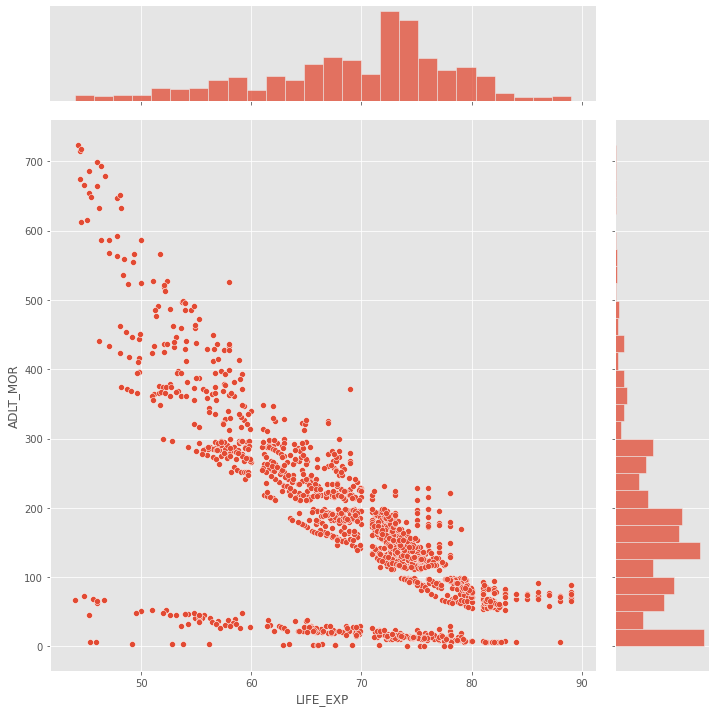

In [326]:
sns.jointplot(x=life_data["LIFE_EXP"], y=life_data["ADLT_MOR"], height=10)
plt.show()

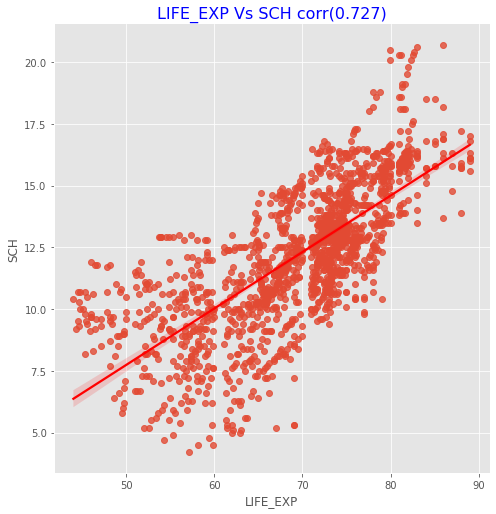

In [327]:
sns.lmplot(x="LIFE_EXP", y="SCH", data=life_data, height=7, line_kws={"color": "red"})
plt.title(f"LIFE_EXP Vs SCH corr({round(life_data.LIFE_EXP.corr(life_data.SCH), 3)})", color="blue", fontsize=16)


plt.show()

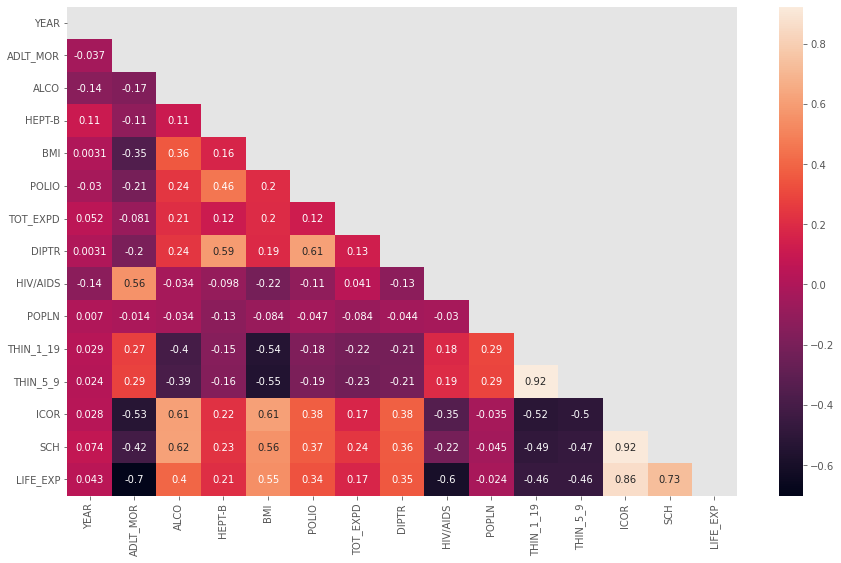

In [328]:
mask = np.zeros_like(life_data.corr())
mask_triangle = np.triu_indices_from(mask)
mask[mask_triangle] = True

plt.figure(figsize=[15, 9])
sns.heatmap(life_data.corr(), mask=mask, annot=True)
plt.show()

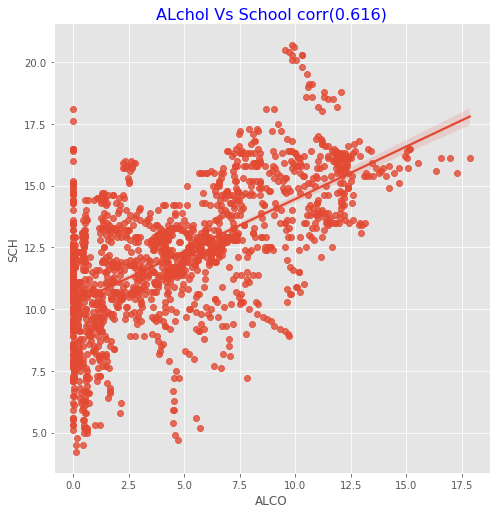

In [329]:
sns.lmplot(x="ALCO", y="SCH", data=life_data, height=7)
plt.title(f"ALchol Vs School corr({round(life_data.ALCO.corr(life_data.SCH), 3)})", fontsize=16, color="blue")
plt.show()

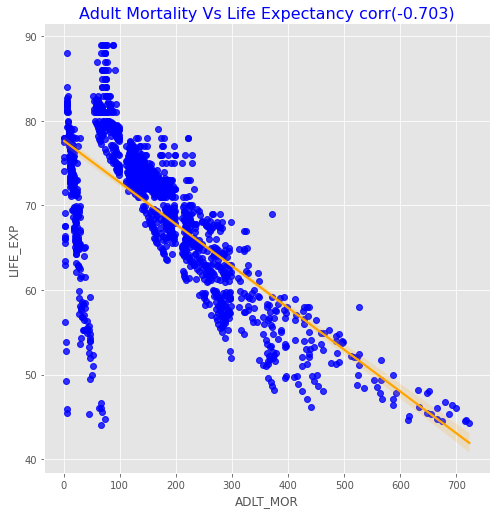

In [330]:
sns.lmplot(x="ADLT_MOR", y="LIFE_EXP", data=life_data, height=7, scatter_kws={"color": "blue"}, line_kws={"color":"orange"})
plt.title(f"Adult Mortality Vs Life Expectancy corr({round(life_data.ADLT_MOR.corr(life_data.LIFE_EXP), 3)})", fontsize=16, color="blue")
plt.show()

# Training and Testing the Algorithm

In [331]:
life_exp = life_data.LIFE_EXP
features = life_data.drop(["LIFE_EXP"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, life_exp, test_size=0.2, random_state=10)

In [332]:
# Running Regression
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [333]:
print("R-Squared of Training data:", regr.score(X_train, y_train))
print("R-Squared of Testing data:", regr.score(X_test, y_test))
print("Intercept:", regr.intercept_)

R-Squared of Training data: 0.8832389828527062
R-Squared of Testing data: 0.8683559775193594
Intercept: 155.4051745763353


In [334]:
DataFrame(data={"coef":regr.coef_})

,coef
0,-5.557047e-02
1,-1.188955e-02
2,-2.065321e-01
3,-1.395700e-03
4,4.241871e-03
5,-1.149901e-03
6,2.485488e-01
7,1.458905e-02
8,-3.420737e-01
9,-2.715828e-11


# P-values and Evaluating coefficients

In [335]:
x_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, x_incl_const)
results = model.fit()

orig_model = DataFrame(data={"coef": np.around(results.params, 3), "p-values": np.around(results.pvalues, 3)})
orig_model

,coef,p-values
const,155.405,0.000
YEAR,-0.056,0.011
ADLT_MOR,-0.012,0.000
ALCO,-0.207,0.000
HEPT-B,-0.001,0.746
BMI,0.004,0.466
POLIO,-0.001,0.812
TOT_EXPD,0.249,0.000
DIPTR,0.015,0.013
HIV/AIDS,-0.342,0.000


# Testing for Multicollinearity

### $$ ALCO = \alpha _0 + \alpha _1YEAR + \alpha _2BMI +.... \alpha _{12}SCH $$

### $$ VIF _{ALCO} = \frac {1}{(1 - R^2 _{ALCO} )} $$

In [336]:
variance_inflation_factor(exog=x_incl_const.values, exog_idx=1)

1.1044544030092471

In [337]:
#vif = [variance_inflation_factor(exog=x_incl_const.values, exog_idx=x) for x in range(x_incl_const.shape[1])]
vif = []
for x in range(x_incl_const.shape[1]):
    vif.append(variance_inflation_factor(exog=x_incl_const.values, exog_idx=x))
    
orig_vif = DataFrame(data={"vif": np.around(vif, 3)}, index=x_incl_const.columns)
frame = [orig_model, orig_vif]
original_model = pd.concat(frame, axis=1)

original_model

,coef,p-values,vif
const,155.405,0.000,267919.590
YEAR,-0.056,0.011,1.104
ADLT_MOR,-0.012,0.000,1.932
ALCO,-0.207,0.000,1.871
HEPT-B,-0.001,0.746,1.654
BMI,0.004,0.466,1.863
POLIO,-0.001,0.812,1.749
TOT_EXPD,0.249,0.000,1.144
DIPTR,0.015,0.013,2.113
HIV/AIDS,-0.342,0.000,1.609


# Model Simplification and the Baysian Information criterion

In [338]:
# BIC: Original Model with All features
origianl_model = DataFrame(data={"coef": np.around(results.params, 3), "p-values": np.around(results.pvalues, 3)})
print("R-sqaured:", results.rsquared)
print("BIC:", results.bic)

R-sqaured: 0.8832389828527062
BIC: 6541.860654291082


In [339]:
# BIC: New Model Excluding Insignificant features and SCH for Multicollinearity
x_excl_const = x_incl_const.drop(["HEPT-B", "BMI", "POLIO", "POPLN", "THIN_1_19", "SCH"], axis=1)
model = sm.OLS(y_train, x_excl_const)
results = model.fit()

print("R-squared:", results.rsquared)
print("BIC:", results.bic)

R-squared: 0.8796613541327255
BIC: 6537.564078677682


In [340]:
# New Model: Calculating the Variance Inflation Factor (VIF)
vif = []
for x in range(x_excl_const.shape[1]):
    vif.append(variance_inflation_factor(exog=x_excl_const.values, exog_idx=x))

new_vif = DataFrame(data={"vif": vif}, index=x_excl_const.columns)

# Pvalues and the VIF
new_model_df = DataFrame(data={"coef": np.around(results.params, 3), "p-values": np.around(results.pvalues, 3)})
new_frames = [new_model_df, np.around(new_vif, 3)]
new_model = pd.concat(new_frames, axis=1)

new_model

,coef,p-values,vif
const,196.365,0.000,257325.741
YEAR,-0.076,0.000,1.061
ADLT_MOR,-0.013,0.000,1.892
ALCO,-0.228,0.000,1.832
TOT_EXPD,0.213,0.000,1.100
DIPTR,0.012,0.007,1.166
HIV/AIDS,-0.357,0.000,1.562
THIN_5_9,-0.064,0.004,1.389
ICOR,41.912,0.000,2.678


In [341]:
# Concating Original Model + new Model Together
all_models = [original_model, new_model]
pd.concat(all_models, axis=1)

,coef,p-values,vif,coef,p-values,vif
const,155.405,0.000,267919.590,196.365,0.000,257325.741
YEAR,-0.056,0.011,1.104,-0.076,0.000,1.061
ADLT_MOR,-0.012,0.000,1.932,-0.013,0.000,1.892
ALCO,-0.207,0.000,1.871,-0.228,0.000,1.832
HEPT-B,-0.001,0.746,1.654,NaN,NaN,NaN
BMI,0.004,0.466,1.863,NaN,NaN,NaN
POLIO,-0.001,0.812,1.749,NaN,NaN,NaN
TOT_EXPD,0.249,0.000,1.144,0.213,0.000,1.100
DIPTR,0.015,0.013,2.113,0.012,0.007,1.166
HIV/AIDS,-0.342,0.000,1.609,-0.357,0.000,1.562


# Residuals and Residual Plots

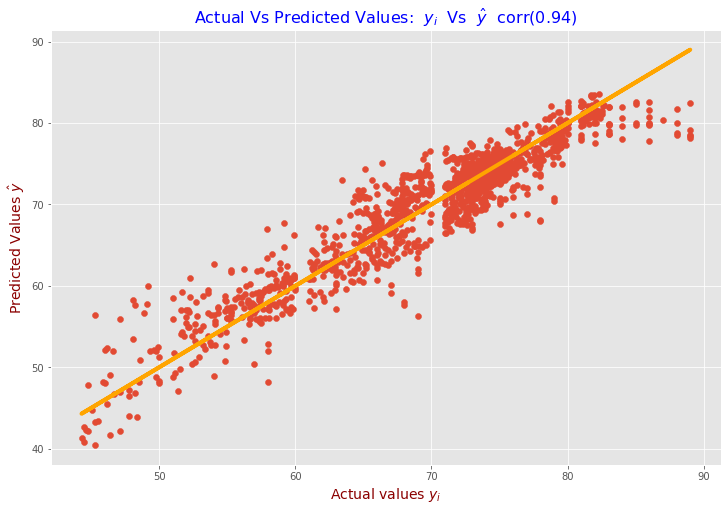

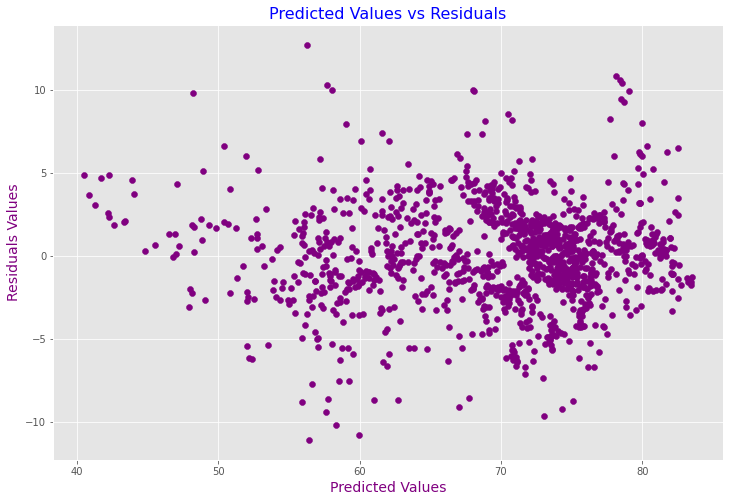

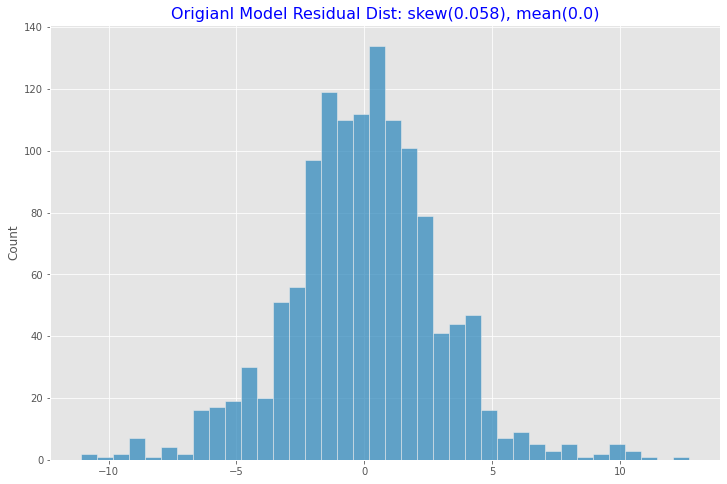

In [342]:
# Original Model with features
x_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, x_incl_const)
results = model.fit()

# Actual Vs Predicted Values
plt.figure(figsize=[12, 8])
plt.scatter(y_train, results.fittedvalues)
plt.plot(y_train, y_train, color="orange", linewidth=4)
plt.title(f"Actual Vs Predicted Values:  $ y _i $  Vs  $ \hat y $  corr({round(y_train.corr(results.fittedvalues), 3)})", 
                                                                                  color="blue", fontsize=16)
plt.xlabel("Actual values $ y _i$", fontsize=14, color="darkred")
plt.ylabel("Predicted Values $ \hat y $", fontsize=14, color="darkred")
plt.show()

# Predicted Vs Residuals
plt.figure(figsize=[12, 8])
plt.scatter(results.fittedvalues, results.resid, color="purple")
plt.title(f"Predicted Values vs Residuals", color="blue", fontsize=16)
plt.xlabel("Predicted Values", color="purple", fontsize=14)
plt.ylabel("Residuals Values", color="purple", fontsize=14)

plt.show()

# Residual Distribution
plt.figure(figsize=[12, 8])
sns.histplot(data=results.resid)
plt.title(f"Origianl Model Residual Dist: skew({round(results.resid.skew(), 3)}), mean({round(results.resid.mean(), 3)})",
         fontsize=16,  color="blue")
plt.show()

In [343]:
orig_model = DataFrame(data={"R-squared": results.rsquared, "MSE": results.mse_resid,
                "RMSE": np.sqrt(results.mse_resid)}, index=["Original Model"])

orig_model

,R-squared,MSE,RMSE
Original Model,0.883239,9.033107,3.005513


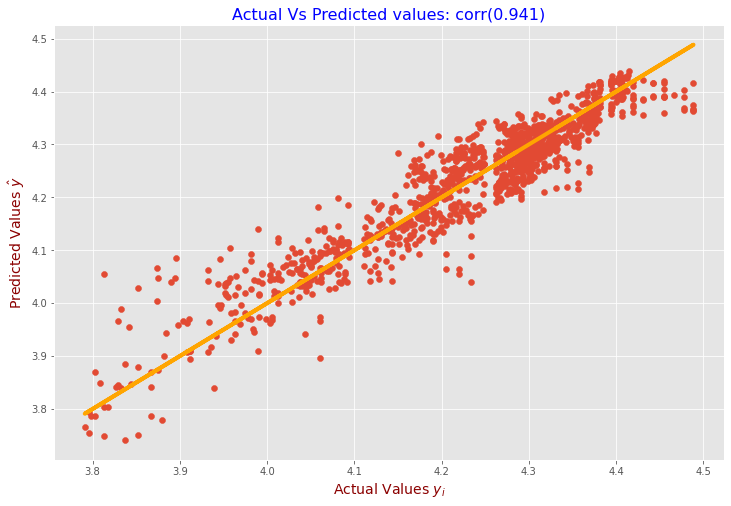

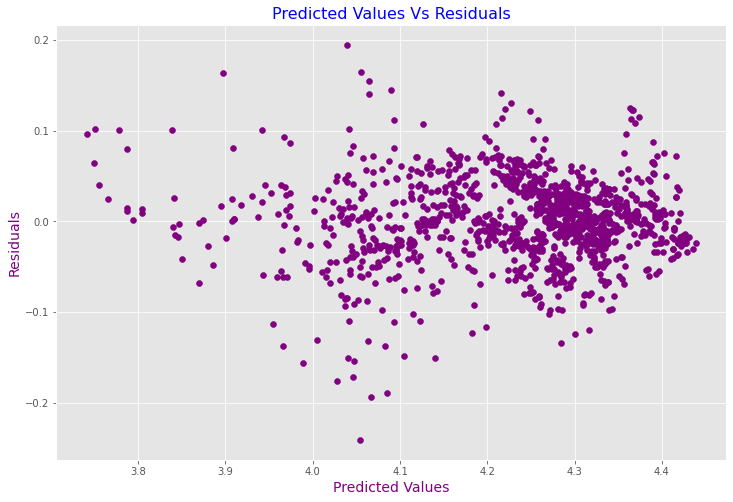

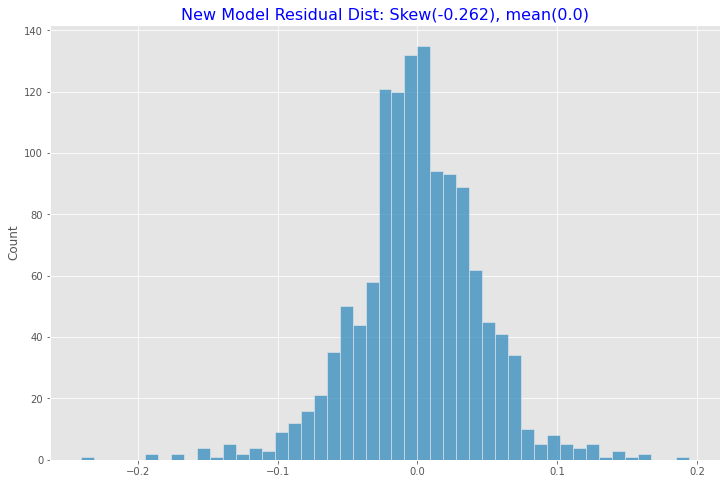

In [344]:
# New Model Excluding Insignificant features 
x_excl_const = x_incl_const.drop(["HEPT-B", "BMI", "POLIO", "POPLN", "THIN_1_19", "SCH"], axis=1)
y_train = np.log(y_train)
model = sm.OLS(y_train, x_excl_const)
results = model.fit()

# Actual Vs Predicted Values
plt.figure(figsize=[12, 8])
plt.scatter(y_train, results.fittedvalues)
plt.plot(y_train, y_train, color="orange", linewidth=4)
plt.title(f"Actual Vs Predicted values: corr({ round(y_train.corr(results.fittedvalues), 3)})", fontsize=16, color="blue")
plt.xlabel("Actual Values $ y _i $", fontsize=14, color="darkred")
plt.ylabel("Predicted Values $ \hat y $", fontsize=14, color="darkred")

plt.show()

# Predicted Vs Residuals
plt.figure(figsize=[12, 8])
plt.scatter(results.fittedvalues, results.resid, color="purple")
plt.title(f"Predicted Values Vs Residuals", fontsize=16, color="blue")
plt.xlabel("Predicted Values", fontsize=14, color="purple")
plt.ylabel("Residuals", fontsize=14, color="purple")

plt.show()

# New Model Residual Distribution
plt.figure(figsize=[12, 8])
sns.histplot(results.resid)
plt.title(f"New Model Residual Dist: Skew({round(results.resid.skew(), 3)}), mean({round(results.resid.mean(), 3)})", 
                             color="blue", fontsize=16)
plt.show()

In [345]:
new_model = DataFrame(data={"R-squared": results.rsquared, "MSE": results.mse_resid, 
                "RMSE": np.sqrt(results.mse_resid)}, index=["New Model"])

all_models = [orig_model, new_model]
pd.concat(all_models)

,R-squared,MSE,RMSE
Original Model,0.883239,9.033107,3.005513
New Model,0.885614,0.002079,0.045595
